In [1]:
info_txt = r"""
likelihood:
  bao.sdss_dr12_consensus_final: null
theory:
  camb:
    extra_args: {num_massive_neutrinos: 1, nnu: 3.044}
params:
  logA:
    prior:
      min: 1.61
      max: 3.91
    ref:
      dist: norm
      loc: 3.05
      scale: 0.001
    proposal: 0.001
    latex: \log(10^{10} A_\mathrm{s})
    drop: true
  As:
    value: 'lambda logA: 1e-10*np.exp(logA)'
    latex: A_\mathrm{s}
  ns:
    prior:
      min: 0.8
      max: 1.2
    ref:
      dist: norm
      loc: 0.965
      scale: 0.004
    proposal: 0.002
    latex: n_\mathrm{s}
  H0:
    prior: {min: 40, max: 100}
    ref: {dist: norm, loc: 70, scale: 2}
    proposal: 2
    latex: H_0
  ombh2:
    prior: {min: 0.005, max: 0.1}
    ref: {dist: norm, loc: 0.0221, scale: 0.0001}
    proposal: 0.0001
    latex: \Omega_\mathrm{b} h^2
  omch2:
    prior: {min: 0.001, max: 0.99}
    ref: {dist: norm, loc: 0.12, scale: 0.001}
    proposal: 0.0005
    latex: \Omega_\mathrm{c} h^2
"""

from cobaya.yaml import yaml_load

info = yaml_load(info_txt)

# Add your external packages installation folder
info['packages_path'] = '/pscratch/sd/c/crisjagq/1er_Taller_DESI/my_cobaya/'

In [2]:
from cobaya.model import get_model
import matplotlib.pyplot as plt
import numpy as np

model = get_model(info)

[camb] `camb` module loaded successfully from /pscratch/sd/c/crisjagq/1er_Taller_DESI/my_cobaya/code/CAMB/camb
[bao.sdss_dr12_consensus_final] Initialized.


In [3]:
print(list(model.parameterization.sampled_params()))

['logA', 'ns', 'H0', 'ombh2', 'omch2']


In [4]:
point = dict(zip(model.parameterization.sampled_params(),
                 model.prior.sample(ignore_external=True)[0]))

point.update({'ombh2': 0.0223, 'omch2': 0.120, 'H0': 67.01712})

logposterior = model.logposterior(point, as_dict=True)
print('Full log-posterior:')
print('   logposterior:', logposterior["logpost"])
print('   logpriors:', logposterior["logpriors"])
print('   loglikelihoods:', logposterior["loglikes"])
print('   derived params:', logposterior["derived"])

Full log-posterior:
   logposterior: -18.672271962338744
   logpriors: {'0': -1.646023618542028}
   loglikelihoods: {'bao.sdss_dr12_consensus_final': -17.026248343796716}
   derived params: {'As': 1.104870267107993e-09, 'chi2__BAO': 34.05249668759343}


In [5]:
print(model.requested())

{'camb.transfers': [{'CAMB_transfers':{'non_linear': False, 'needs_perts': False}}, {'CAMB_transfers':{'non_linear': False, 'needs_perts': True}}], 'camb': [{'angular_diameter_distance':{'z': array([0.38, 0.51, 0.61])}}, {'rdrag':None}, {'Hubble':{'z': array([0.38, 0.51, 0.61])}}, {'fsigma8':{'z': array([0.38, 0.51, 0.61])}}]}


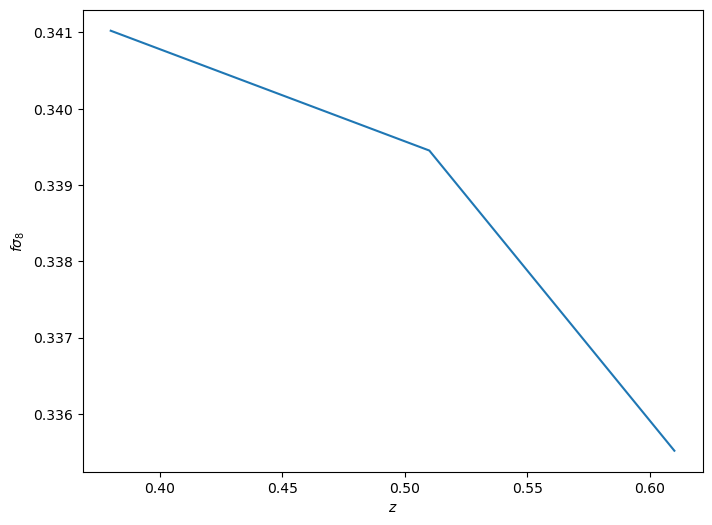

In [6]:
z=np.array([0.38, 0.51, 0.61])
fsigma8 = model.provider.get_fsigma8(z)

plt.figure(figsize=(8, 6))
plt.plot(z, fsigma8)
plt.ylabel(r"$f\sigma_8$")
plt.xlabel(r"$z$")
plt.show()

In [12]:
point = dict(zip(model.parameterization.sampled_params(),
                 model.prior.sample(ignore_external=True)[0]))

point.update({'ombh2': 0.0223, 'omch2': 0.120, 'H0': 67.01712})
print(point)

{'logA': 2.7729792806899267, 'ns': 1.018473795222674, 'H0': 67.01712, 'ombh2': 0.0223, 'omch2': 0.12}


In [15]:
redshifts = np.linspace(0, 2.5, 40)
model.add_requirements({"Hubble": {"z": redshifts}})
model.add_requirements({"angular_diameter_distance": {"z": redshifts}})
model.add_requirements({"fsigma8": {"z": redshifts}})

ombh2 = [0.0215, 0.0220, 0.0225, 0.0230, 0.0235]
omch2 = [0.115, 0.12, 0.125, 0.130, 0.135]

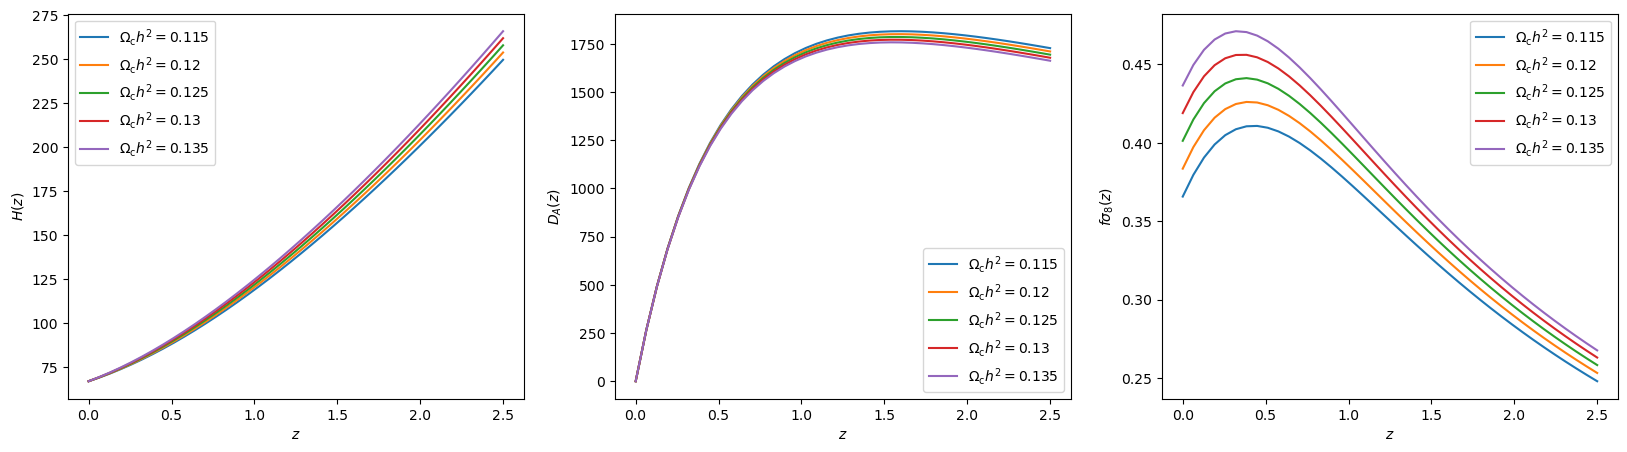

In [16]:
f, (ax_h, ax_da, ax_fs8) = plt.subplots(1, 3, figsize=(20, 5))
for o in omch2:
    point["omch2"] = o
    model.logposterior(point)  # to force computation of theory
    Hz = model.provider.get_Hubble(redshifts)
    DA = model.provider.get_angular_diameter_distance(redshifts)
    fsigma8 = model.provider.get_fsigma8(redshifts)
    ax_h.plot(redshifts, Hz, label=r"$\Omega_\mathrm{c}h^2=%g$" % o)
    ax_da.plot(redshifts, DA, label=r"$\Omega_\mathrm{c}h^2=%g$" % o)
    ax_fs8.plot(redshifts, fsigma8, label=r"$\Omega_\mathrm{c}h^2=%g$" % o)
ax_h.set_ylabel(r"$H(z)$")
ax_da.set_ylabel(r"$D_A(z)$")
ax_fs8.set_ylabel(r"$f\sigma_8(z)$")
ax_h.set_xlabel(r"$z$")
ax_da.set_xlabel(r"$z$")
ax_fs8.set_xlabel(r"$z$")
ax_h.legend()
ax_da.legend()
ax_fs8.legend()